# マルチメディア処理入門 第14回

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schwalbe1996/multimedia_intro/blob/main/notebook14.ipynb)

Google Colabで試したい場合は、上のボタンをクリックして、「ドライブにコピー」を実行してください。（ドライブにコピーしないとコードを変更しても保存できません）

In [ ]:
# colabユーザだけここを実行
!wget https://github.com/schwalbe1996/multimedia_intro/raw/main/coin.png
!wget https://github.com/schwalbe1996/multimedia_intro/raw/main/hand0.jpg


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import cm
import cv2
import numpy as np

## 画像表示用関数

In [2]:
def show_image(image, cmap = cm.gray, title=None):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, title=title)
    if image.ndim == 3:
        im = ax.imshow(image[:,:,::-1])
    elif image.ndim == 2:
        im = ax.imshow(image, cmap=cmap)
        fig.colorbar(im)
        
def show_decomposed_images(image, image3, cmap=cm.gray, title=(None,None,None,None)):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(221, title=title[0])
    ax2 = fig.add_subplot(222, title=title[1])
    ax3 = fig.add_subplot(223, title=title[2])
    ax4 = fig.add_subplot(224, title=title[3])
    im1 = ax1.imshow(image[:,:,::-1])
    im2 = ax2.imshow(image3[:,:,0], cmap=cmap)
    im3 = ax3.imshow(image3[:,:,1], cmap=cmap)
    im4 = ax4.imshow(image3[:,:,2], cmap=cmap)
    plt.colorbar(im2,ax=ax2)
    plt.colorbar(im3,ax=ax3)
    plt.colorbar(im4,ax=ax4)
    plt.show()    

## 本日の画像

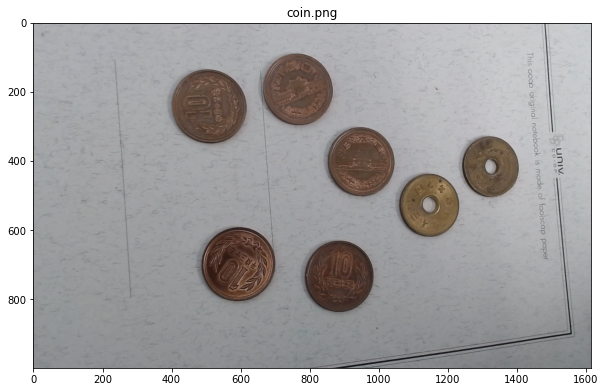

In [3]:
image = cv2.imread("coin.png")
show_image(image, title="coin.png")

## (復習）大津の方法による二値化

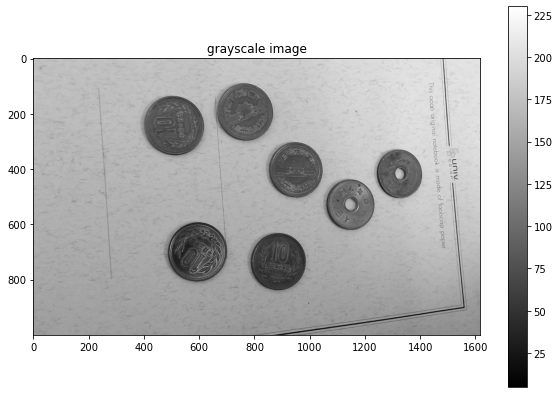

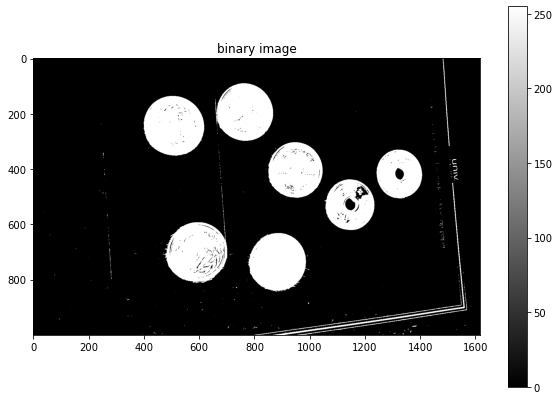

In [4]:
# カラー画像（BGR）からモノクロ画像に変換する
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 大津の方法による二値化。今回は黒っぽいところを前景として使いたいので、cv2.THRESH_BINARYの代わりにcv2.THRESH_BINARY_INVを使います。
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU  + cv2.THRESH_BINARY_INV)
show_image(gray, title="grayscale image")
show_image(mask, title="binary image")

## 膨張・縮小処理

[[1 1 1]
 [1 1 1]
 [1 1 1]]


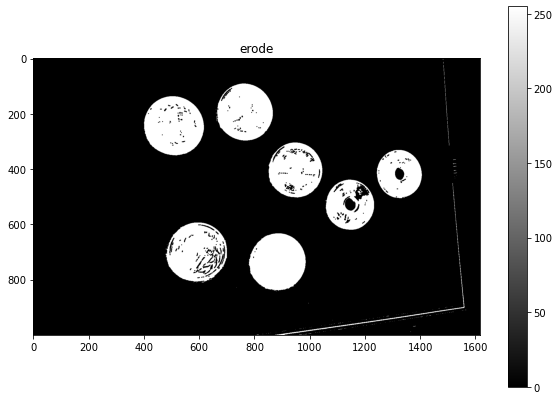

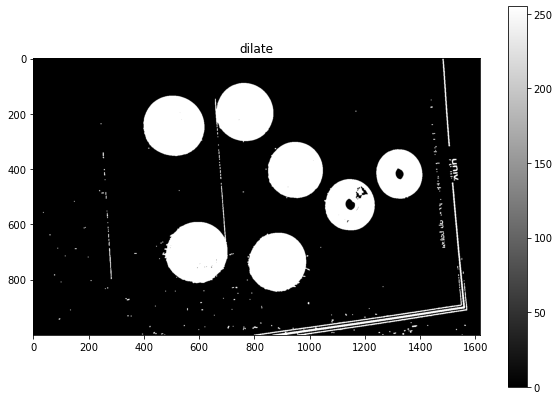

In [5]:
N = 3
kernel = np.ones((N,N),np.uint8)
print (kernel)

# 縮小処理： Nの値を変えていろいろと試してみてください。
dst = cv2.erode(mask, kernel)
show_image(dst, title = "erode")

# 膨張処理： Nの値を変えていろいろと試してみてください。
dst = cv2.dilate(mask, kernel)
show_image(dst, title = "dilate")

## オープニングとクロージング

[[1 1 1]
 [1 1 1]
 [1 1 1]]


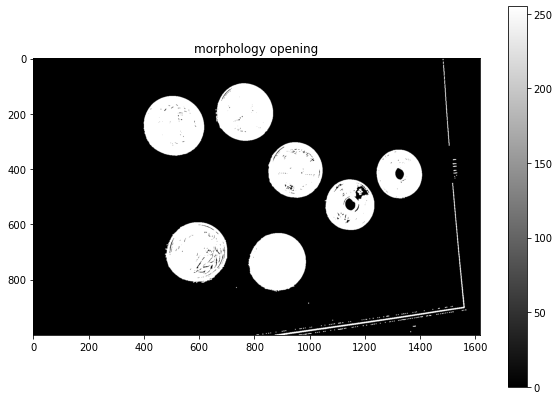

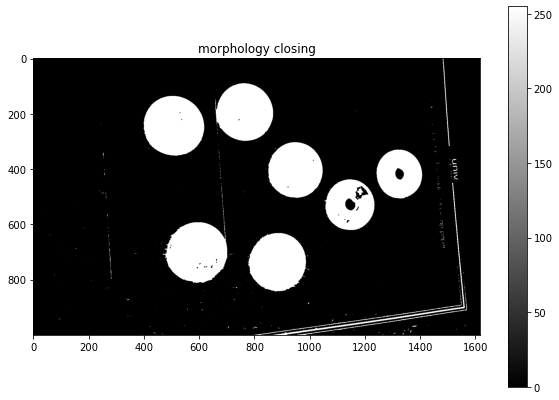

In [6]:
N = 3
kernel = np.ones((N,N),np.uint8)
print (kernel)

# どちらもcv2.morphologyExを使います。
# オープニング： cv2.MORPH_OPENを指定
dst = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
show_image(dst, title="morphology opening")

# クロージング： cv2.MORPH_CLOSEを指定
dst = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
show_image(dst, title="morphology closing")

## オープニング＆クロージング

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


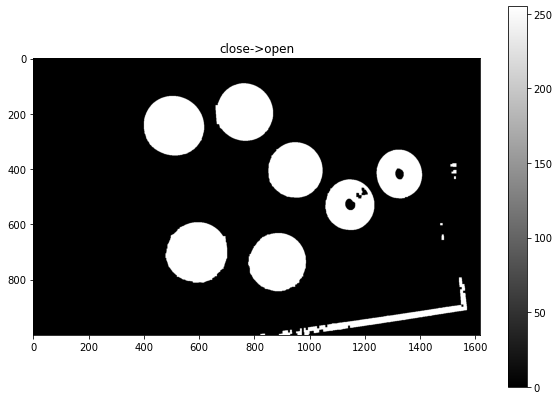

In [7]:
# クロージングで穴を埋めて、その後、オープニングで孤立点を削除します。
N = 7
kernel = np.ones((N,N),np.uint8)
print (kernel)


dst = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)
show_image(dst, title="close->open")

## ラベリング

16個の領域が見つかりました。


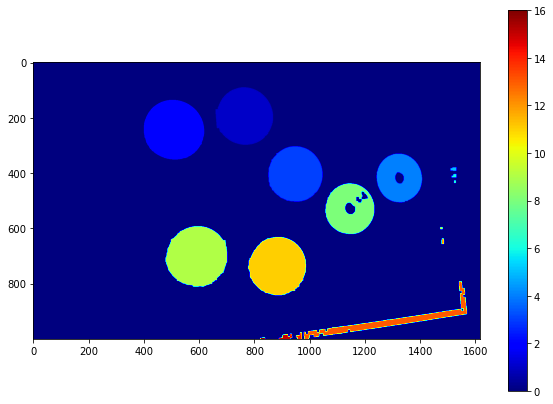

In [8]:
# cv2.connectedComponentsWithStatsを使います。引数には先ほど作成した二値画像を指定します。
nLabels, label, stats, center = cv2.connectedComponentsWithStats(dst)

# 実行すると4つの値が戻ってきます。
# nLabels: 領域の個数（+1)
# label: 入力した画像と同じサイズのラベル画像。各ピクセルには領域番号を表す0〜nLabels-1の整数が入ってます。
# stats: 各領域の情報。領域を囲む四角形の（左上のx座標、左上のy座標、幅、高さ）、および領域の面積（ピクセル数）が返ってくる。なお、stats[0]は背景の情報。
# center: 各領域の重心の(x,y)座標

print ("{}個の領域が見つかりました。".format(nLabels-1))
show_image(label,cmap=cm.jet)

### [応用] ラベル番号と面積を表示してみよう

1番目の領域：(764,195)を中心とした面積33727
2番目の領域：(508,244)を中心とした面積37175
3番目の領域：(948,404)を中心とした面積31096
4番目の領域：(1323,418)を中心とした面積21861
5番目の領域：(1520,386)を中心とした面積256
6番目の領域：(1522,410)を中心とした面積195
7番目の領域：(1525,431)を中心とした面積70
8番目の領域：(1144,530)を中心とした面積23751
9番目の領域：(592,701)を中心とした面積38076
10番目の領域：(1476,599)を中心とした面積72
11番目の領域：(883,736)を中心とした面積34221
12番目の領域：(1480,646)を中心とした面積169
13番目の領域：(1304,932)を中心とした面積14863
14番目の領域：(963,989)を中心とした面積325
15番目の領域：(915,991)を中心とした面積564
16番目の領域：(830,997)を中心とした面積78


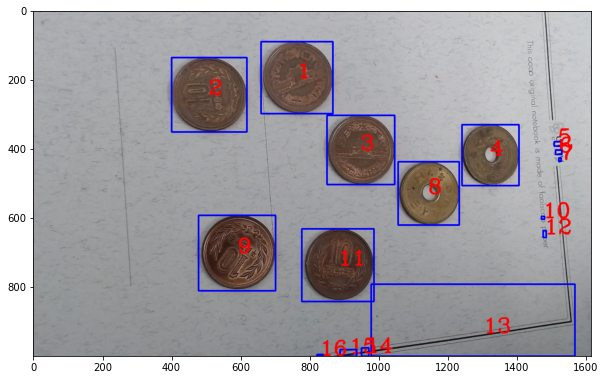

In [9]:
# 元の画像に、ラベル番号と面積を書き込んでみます。
disp = image.copy()
for n in range(1,nLabels): # 1,2,...,nLabels-1 
    cx = int(center[n][0])
    cy = int(center[n][1])
    lx, ly, width, height, area = stats[n]    
    print ("{}番目の領域：({},{})を中心とした面積{}".format(n, cx, cy, area))
    
    cv2.putText(disp, text=str(n), org=(cx,cy), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=2.0, color=(0,0,255), thickness=3)
    
    cv2.rectangle(disp, (lx,ly), (lx+width,ly+height), color=(255,0,0), thickness=3)

show_image(disp)    

### 応用：面積が20000以上の領域だけを残してみよう

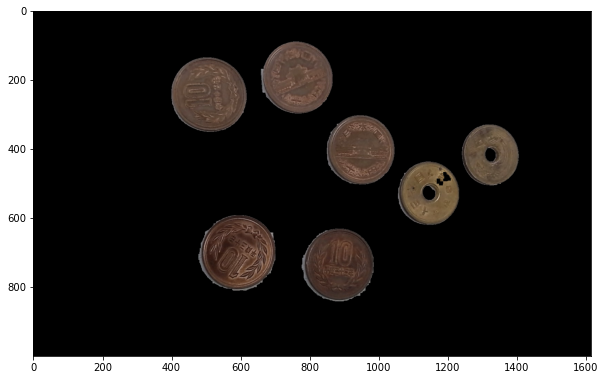

In [10]:
# まずは元画像と同じサイズのまっ黒の画像を用意
disp = np.zeros_like(image)


for i in range(1,nLabels):
    if stats[i][4] < 20000: # 面積が1000未満ならスキップ
        continue
    disp[ label == i] = image[label==i]

show_image(disp)

## 距離変換

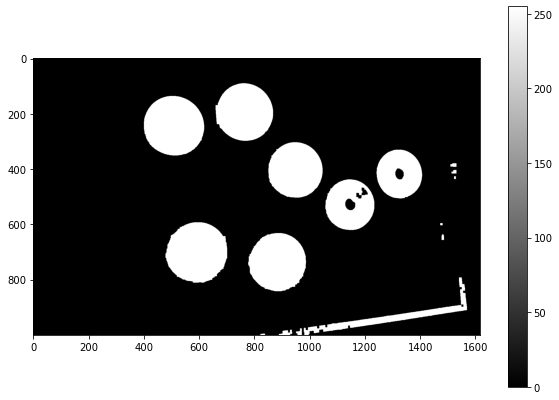

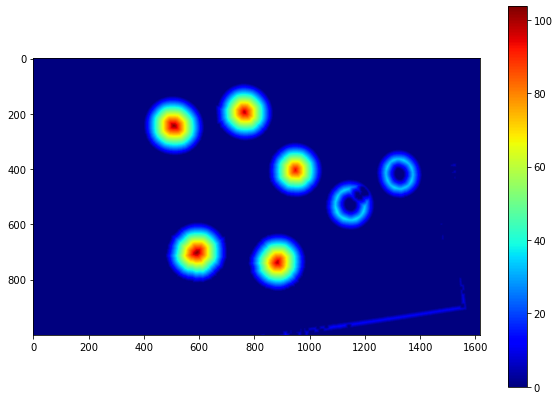

In [11]:
# cv2.distanceTransform を使います。
# distanceType=cv2.DIST_L2, maskSize=3
ret = cv2.distanceTransform(dst,distanceType=cv2.DIST_L2, maskSize=3)
show_image(dst)
show_image(ret,cmap=cm.jet)

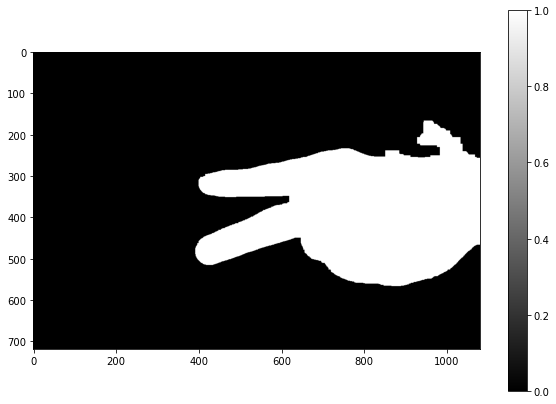

In [13]:
image = cv2.imread("hand0.jpg")
image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV_FULL)
H = image_HSV[:,:,0]
S = image_HSV[:,:,1]

mask = (H > 100) & (S > 50)
mask = mask.astype(np.uint8)
kernel = np.ones((15,15),dtype=np.uint8)
dst = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
dst = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)

nLabels, label, stats, center = cv2.connectedComponentsWithStats(dst)
area = [s[4] for s in stats]
area[0] = 0
hand_id = np.argmax(area)

show_image(label==hand_id)

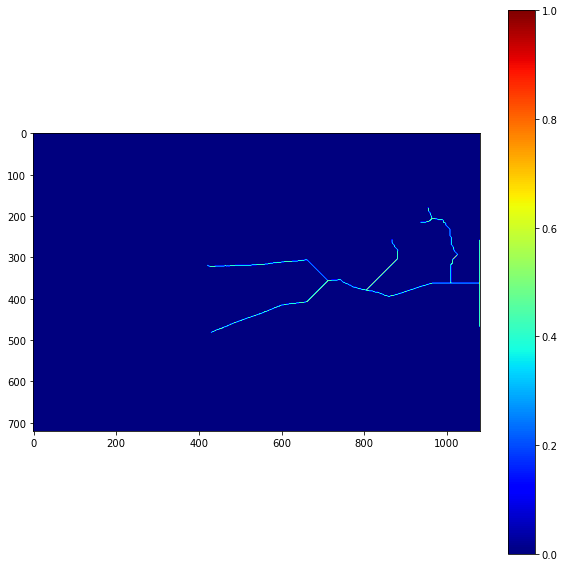

In [14]:
hand = label==hand_id
hand = hand.astype(np.uint8)*255
ret = cv2.ximgproc.thinning(hand)
fig = plt.figure(figsize=(10,10))
plt.imshow(ret>0, cmap=cm.jet)
plt.colorbar()